<a href="https://colab.research.google.com/github/MahparaBadar/Deep-Learning/blob/main/MAHPARA_BADAR(DEEP_LEARNING_FINAL__EXAM)ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MAHPARA BADAR**

**BATCH-V**

**DATA SCIENCE WITH ARTIFICIAL INTELLIGENCE**

**DEEP LEARNING**

**FINAL EXAM**

**ANSWER NO. 1**


1- Which of the following techniques does NOT prevent a model from overfitting?

**(iv) None of the above**

2- A 2-layer neural network with 5 neurons in each layer has a total of 60
parameters (i.e. weights and biases)

**(ii) False**

3-Which of the following is true about the vanishing gradient problem?
(Circle all that apply)

**(ii) Vanishing gradient causes deeper layers to learn more slowly than earlier layers.**
**(iii) Leaky ReLU is less likely to suffer from vanishing gradients than sigmoid.**
**(iv) Xavier initialization can help prevent the vanishing gradient problem.**

4-Consider a trained logistic regression. Its weight vector is W and its test accuracy
on a given data set is A. Assuming there is no bias, dividing W by 2 won’t change the test accuracy.

**(ii) False**

5- After training a neural network, you observe a large gap between the training accuracy (100%) and the test accuracy (42%). Which of the following methods is commonly used to reduce this?

**(ii) Dropout**




**ANSWER NO.2**


**(1)**

Yes, My friend is absolutely right.

Here's why shuffling the training set is crucial:

Preventing bias: If the data is not shuffled, the model might learn to predict based on the order of the images rather than their actual content. This can lead to a biased model that performs poorly on unseen data.
Ensuring diverse batches: Shuffling ensures that each mini-batch contains a mix of dog and cat images, preventing the model from learning to predict based on the order of the images within a batch.
Improving generalization: Shuffling helps the model generalize better to unseen data by exposing it to a variety of image combinations during training.
In summary, shuffling the training set is essential for preventing bias and improving the generalization performance of your model.



**(2)**

**a.** **Loss function:** For multi-class classification like cat breed prediction, you would typically use categorical cross-entropy. This loss function measures the dissimilarity between the predicted probability distribution and the true distribution.

**b.** **Activation function:** The output layer of your neural network should use the softmax activation function. This ensures that the predicted probabilities for all 10 classes sum up to 1. For the hidden layers, you can use activation functions like ReLU or Leaky ReLU.

**c.** Additional hyperparameters for transfer learning:

**Number of trainable layers:** Decide how many layers of the pre-trained model you want to freeze and which ones to train.

**Learning rate:** You might need to adjust the learning rate to account for the different number of classes and the pre-trained weights.

**Fine-tuning epochs:** Determine the number of epochs to train the newly added layers while keeping the pre-trained layers frozen.

**Data augmentation:** Consider using data augmentation techniques to increase the diversity of your training data and improve generalization.



**(3)**

Non-linearity in deep neural networks is essential for modeling complex relationships in data. Without non-linear activation functions, a deep network would effectively be a series of linear transformations, which can only learn linear functions. By introducing non-linearity, the network can learn and represent a much wider range of patterns, making it capable of solving complex tasks such as image recognition, natural language processing, and more.



**(4)**

Convolutional layers, pooling layers, and fully connected layers are three commonly used layers in convolutional neural networks (CNNs).

**Convolutional layers:** These layers extract features from the input image by applying filters to it.

**Pooling layers:** These layers reduce the dimensionality of the feature maps while preserving important information. Common pooling techniques include max pooling and average pooling.

**Fully connected layers:** These layers are similar to those used in traditional neural networks and are used to classify or predict the output based on the extracted features.

**ANSWER NO. 3**

In [72]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [82]:
!kaggle datasets download -d aneesh10/cricket-shot-dataset

Dataset URL: https://www.kaggle.com/datasets/aneesh10/cricket-shot-dataset
License(s): unknown
 98% 633M/645M [00:05<00:00, 43.1MB/s]
100% 645M/645M [00:05<00:00, 116MB/s] 


In [94]:
!kaggle datasets download -d aneesh10/cricket-shot-dataset --force


Dataset URL: https://www.kaggle.com/datasets/aneesh10/cricket-shot-dataset
License(s): unknown
 98% 631M/645M [00:05<00:00, 87.2MB/s]
100% 645M/645M [00:05<00:00, 113MB/s] 


In [102]:
!unzip -l /content/cricket-shot-dataset.zip


Archive:  /content/cricket-shot-dataset.zip
  Length      Date    Time    Name
---------  ---------- -----   ----
   103256  2022-09-20 16:05   data/drive/drives1.png
   102890  2022-09-20 16:05   data/drive/drives10.png
    68799  2022-09-20 16:05   data/drive/drives100.png
    83317  2022-09-20 16:05   data/drive/drives1000.png
    87639  2022-09-20 16:05   data/drive/drives1001.png
     8512  2022-09-20 16:05   data/drive/drives1002.jpeg
    70863  2022-09-20 16:05   data/drive/drives1003.png
    83010  2022-09-20 16:05   data/drive/drives1004.png
    84403  2022-09-20 16:05   data/drive/drives1005.png
    87994  2022-09-20 16:05   data/drive/drives1006.png
    78479  2022-09-20 16:05   data/drive/drives1007.png
     6544  2022-09-20 16:05   data/drive/drives1008.jpeg
   120472  2022-09-20 16:05   data/drive/drives1009.png
    72904  2022-09-20 16:05   data/drive/drives101.png
   107882  2022-09-20 16:05   data/drive/drives1010.png
   106742  2022-09-20 16:05   data/drive/drives1011

In [103]:
import zipfile
zip_ref = zipfile.ZipFile('/content/cricket-shot-dataset.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()


In [96]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [97]:
data_dir = '/content/cricket-shot-dataset'

In [98]:
img_size = (224, 224)
batch_size = 32

In [99]:
# Data Augmentation (Even though the dataset is already augmented, slight augmentation may help)
datagen = ImageDataGenerator(
    rescale=1.0/255.0,  # Normalize pixel values to [0, 1]
    validation_split=0.2  # Split data for training and validation
)

In [105]:
# Train and validation data generators
train_gen = datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

FileNotFoundError: [Errno 2] No such file or directory: '/content/cricket-shot-dataset'

In [18]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [19]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)  # Fully connected layer
predictions = Dense(train_gen.num_classes, activation='softmax')(x)  # Output layer

In [20]:
model = Model(inputs=base_model.input, outputs=predictions)

In [21]:
for layer in base_model.layers:
    layer.trainable = False

In [22]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [71]:
# Train the model
history = model.fit(
    train_gen,
    epochs=10,  # Set number of epochs
    validation_data=val_gen
)

ValueError: You must call `compile()` before using the model.

In [ ]:
# Plot accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

plt.show()

# Evaluate the model on validation set
val_loss, val_acc = model.evaluate(val_gen)
print(f"Validation Accuracy: {val_acc*100:.2f}%")


**ANSWER NO. 5**

In [44]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [45]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

In [46]:
a = 'This was a boring movie.'
sid.polarity_scores(a)

{'neg': 0.434, 'neu': 0.566, 'pos': 0.0, 'compound': -0.3182}

In [47]:
a = 'This movie was amazing!'
sid.polarity_scores(a)

{'neg': 0.0, 'neu': 0.423, 'pos': 0.577, 'compound': 0.6239}

In [48]:
a = 'Very disappointing experience.'
sid.polarity_scores(a)

{'neg': 0.636, 'neu': 0.364, 'pos': 0.0, 'compound': -0.5413}

**Sentiment Analysis using RNN (Applying Embedding
Technique)**

In [59]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from textblob import TextBlob

# Step 1: Create a small dataset
data = {
    'text': [
        "I love this product!",   # Positive
        "This is the worst experience ever.",  # Negative
        "Absolutely fantastic!",   # Positive
        "I hate it.",             # Negative
        "The best purchase I've made!",  # Positive
        "Terrible service.",       # Negative
        "I'm very satisfied with my order.",  # Positive
        "Not worth the money.",    # Negative
        "Highly recommend this!",   # Positive
        "Will never buy again."    # Negative
    ],
    'label': [1, 0, 1, 0, 1, 0, 1, 0, 1, 0]  # 1: Positive, 0: Negative
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Step 2: Preprocess the data
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)

# Tokenization
tokenizer = Tokenizer(num_words=1000)
tokenizer.fit_on_texts(X_train)

# Convert texts to sequences
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad sequences to ensure uniform input size
max_length = 10  # Maximum length of sequences
X_train_pad = pad_sequences(X_train_seq, maxlen=max_length, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_length, padding='post')

# Step 3: Build the RNN Model
model = Sequential()
model.add(Embedding(input_dim=1000, output_dim=64, input_length=max_length))
model.add(SimpleRNN(32))  # Simple RNN layer
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 4: Train the model
model.fit(X_train_pad, y_train, epochs=10, batch_size=2, validation_split=0.2)

# Step 5: Evaluate the model
loss, accuracy = model.evaluate(X_test_pad, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 268ms/step - accuracy: 0.1458 - loss: 0.7440 - val_accuracy: 0.0000e+00 - val_loss: 0.7651
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8542 - loss: 0.6759 - val_accuracy: 0.0000e+00 - val_loss: 0.7642
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 1.0000 - loss: 0.6298 - val_accuracy: 0.0000e+00 - val_loss: 0.7612
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 1.0000 - loss: 0.5801 - val_accuracy: 0.0000e+00 - val_loss: 0.7620
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 1.0000 - loss: 0.5464 - val_accuracy: 0.0000e+00 - val_loss: 0.7682
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 1.0000 - loss: 0.4877 - val_accuracy: 0.0000e+00 - val_loss: 0.7805
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 1.0000 - loss: 0.4163 - val_accuracy: 0.0000e+00 - val_loss: 0.8004
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 1.0000 - loss: 0.3506 - val_accurac

In [60]:
# Function to predict sentiment
def predict_sentiment(text):
    sequence = tokenizer.texts_to_sequences([text])
    padded = pad_sequences(sequence, maxlen=10)
    prediction = model.predict(padded)
    return 'Positive' if prediction[0][0] > 0.5 else 'Negative'

# Test predictions
test_sentences = [
    "I'm so happy!",
    "This is a terrible product.",
    "I enjoy using this!",
    "Not worth the money."
]

for sentence in test_sentences:
    print(f"Sentence: '{sentence}' | Prediction: {predict_sentiment(sentence)}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
Sentence: 'I'm so happy!' | Prediction: Positive
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Sentence: 'This is a terrible product.' | Prediction: Positive
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Sentence: 'I enjoy using this!' | Prediction: Negative
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Sentence: 'Not worth the money.' | Prediction: Positive


In [61]:
# Polarity scores using TextBlob
for sentence in test_sentences:
    blob = TextBlob(sentence)
    print(f"Sentence: '{sentence}' | Polarity: {blob.sentiment.polarity}")


Sentence: 'I'm so happy!' | Polarity: 1.0
Sentence: 'This is a terrible product.' | Polarity: -1.0
Sentence: 'I enjoy using this!' | Polarity: 0.5
Sentence: 'Not worth the money.' | Polarity: -0.15


In [62]:
# Function to predict sentiment
def predict_sentiment(text):
    sequence = tokenizer.texts_to_sequences([text])
    padded = pad_sequences(sequence, maxlen=10)
    prediction = model.predict(padded)
    return 'Positive' if prediction[0][0] > 0.5 else 'Negative'

# Test predictions
test_sentences = [
    "Absolutely fantastic!",   # Positive
        "I hate it.",             # Negative
        "The best purchase I've made!",  # Positive
        "Terrible service.",       # Negative
        "I'm very satisfied with my order.",  # Positive
        "Not worth the money.",
]

for sentence in test_sentences:
    print(f"Sentence: '{sentence}' | Prediction: {predict_sentiment(sentence)}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Sentence: 'Absolutely fantastic!' | Prediction: Negative
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Sentence: 'I hate it.' | Prediction: Positive
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Sentence: 'The best purchase I've made!' | Prediction: Positive
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Sentence: 'Terrible service.' | Prediction: Positive
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Sentence: 'I'm very satisfied with my order.' | Prediction: Positive
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Sentence: 'Not worth the money.' | Prediction: Positive


In [63]:
# Polarity scores using TextBlob
for sentence in test_sentences:
    blob = TextBlob(sentence)
    print(f"Sentence: '{sentence}' | Polarity: {blob.sentiment.polarity}")


Sentence: 'Absolutely fantastic!' | Polarity: 0.5
Sentence: 'I hate it.' | Polarity: -0.8
Sentence: 'The best purchase I've made!' | Polarity: 1.0
Sentence: 'Terrible service.' | Polarity: -1.0
Sentence: 'I'm very satisfied with my order.' | Polarity: 0.65
Sentence: 'Not worth the money.' | Polarity: -0.15


**ANSWER NO.4**

a. What do you understand by the Transfer Learning?

Transfer learning is a technique where a pre-trained model is used as a starting point for a new task. Instead of training a model from scratch, we fine-tune the pre-trained model on our new dataset. This saves time and resources, especially when working with smaller datasets.

In transfer learning, we typically:

**Load a pre-trained model:** Choose a model that has been trained on a large dataset (e.g., ImageNet).

**Freeze layers:** Freeze the early layers of the pre-trained model to preserve their learned features.

**Add new layers:** Add new layers on top of the frozen layers to adapt the model to the new task.

**Train the new layers:** Train only the newly added layers while keeping the frozen layers fixed.

b. Draw a given model using keras Functional API

In [69]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Concatenate
from tensorflow.keras.models import Model

# Input Layers
input1 = Input(shape=(32,), name='input1')
input2 = Input(shape=(128,), name='input2')

# Dense Layers for Input 1
dense1 = Dense(8, activation='relu')(input1)
dense2 = Dense(4, activation='relu')(dense1)

# Dense Layers for Input 2
dense3 = Dense(64, activation='relu')(input2)
dense4 = Dense(32, activation='relu')(dense3)

# Dense Layer for input1 after dense2
dense5 = Dense(4, activation='relu')(dense2)

# Concatenation
concatenated = Concatenate()([dense5, dense4])  # Concatenating the outputs

# Dense Layers after Concatenation
dense6 = Dense(2, activation='relu')(concatenated)
output = Dense(1, activation='sigmoid', name='output')(dense6)

# Create the Model
model = Model(inputs=[input1, input2], outputs=output)

# Summary of the model
model.summary()


Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input1 (InputLayer)       │ (None, 32)             │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_16 (Dense)          │ (None, 8)              │            264 │ input1[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input2 (InputLayer)       │ (None, 128)            │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_17 (Dense)          │ (None, 4)              │             36 │ dense_16[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_18 (Dense)          │ (None, 64)             │          8,256 │ input2[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_20 (Dense)          │ (None, 4)              │             20 │ dense_17[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_19 (Dense)          │ (None, 32)             │          2,080 │ dense_18[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_3             │ (None, 36)             │              0 │ dense_20[0][0],        │
│ (Concatenate)             │                        │                │ dense_19[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_21 (Dense)          │ (None, 2)              │             74 │ concatenate_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ output (Dense)            │ (None, 1)              │              3 │ dense_21[0][0]         │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 10,733 (41.93 KB)

 Trainable params: 10,733 (41.93 KB)

 Non-trainable params: 0 (0.00 B)

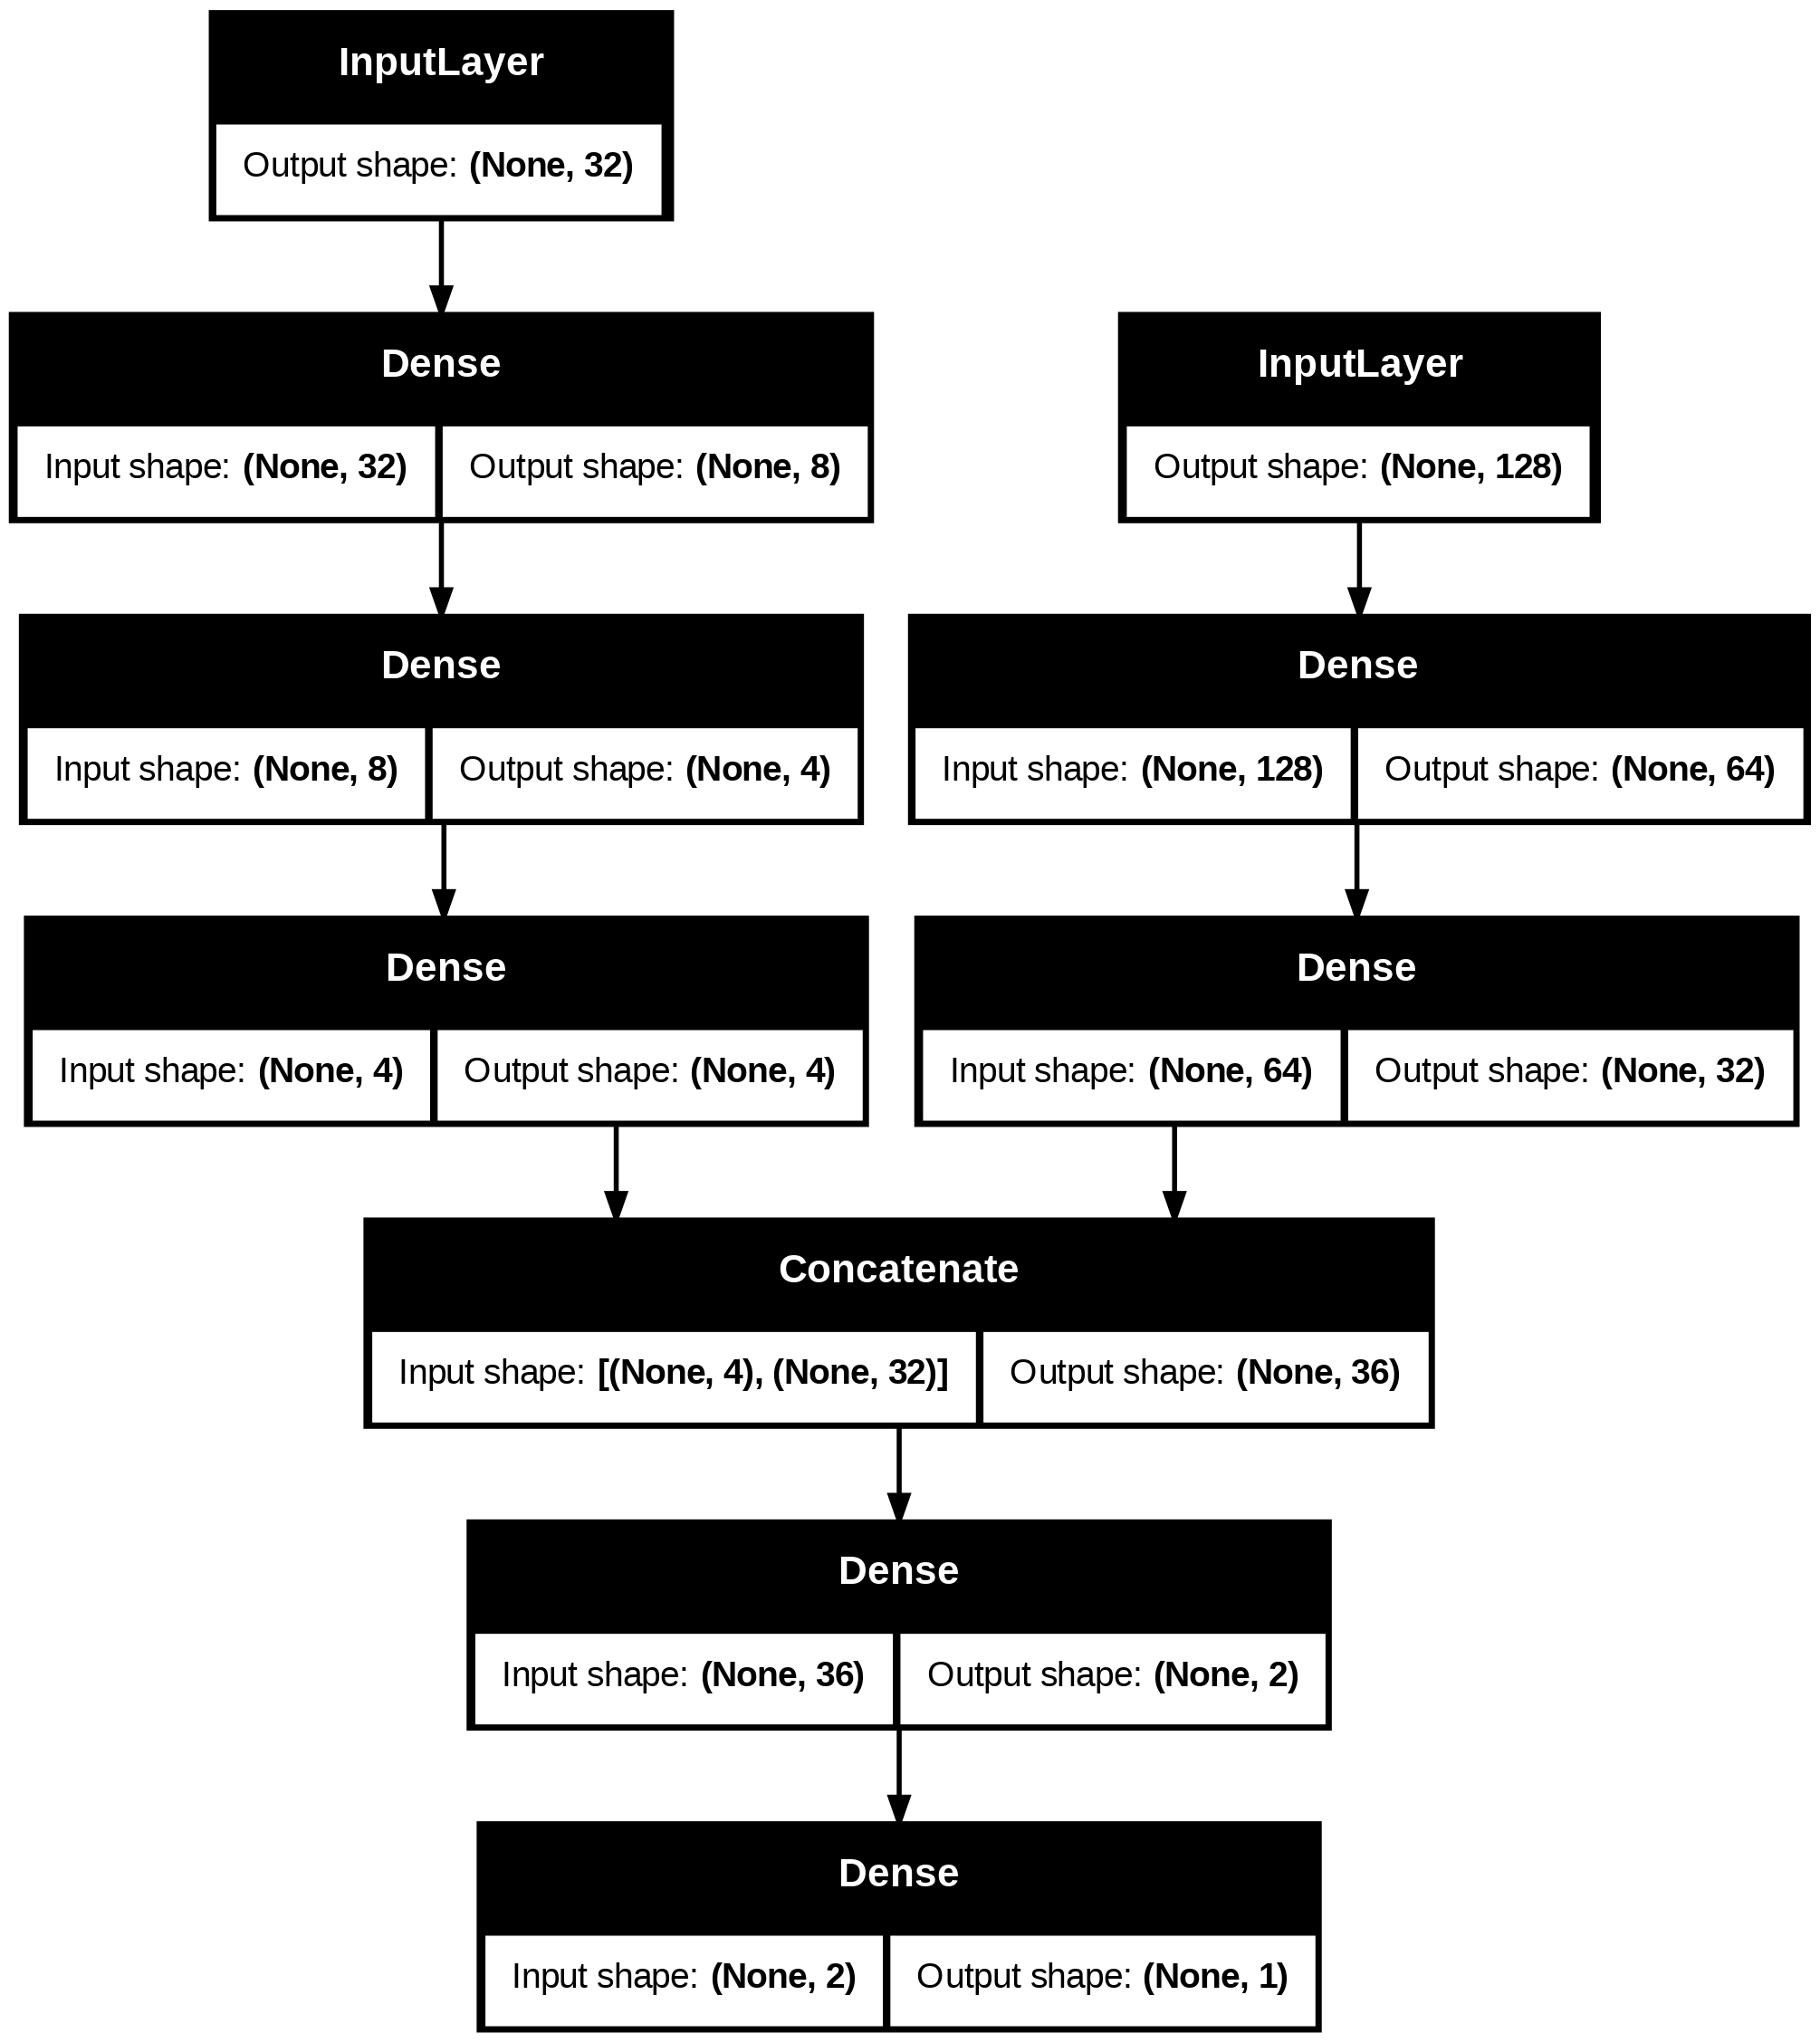

In [70]:
from keras.utils import plot_model
plot_model(model,show_shapes=True)